## TALLER
Nombre: Mercy Arrobo

In [1]:
#Importación de librerías necesarias
import cv2
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import shutil
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, img_to_array, load_img
from  PIL  import Image
from rembg import remove
from sklearn.preprocessing import MinMaxScaler
import h5py
from time import sleep
#para la segunda parte
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
#AlexNet
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization

# Procesamiento de imagenes

In [2]:
"""Declarar y presentar la dirección donde se encuentran las imagenes"""
ruta_imagen = "./PROYECTOIA-U3"
nombre_clases = os.listdir(ruta_imagen )
nombre_clases.sort()
"""Presentando etiquetas"""
print(nombre_clases)

['Ariel Chabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'HectorCedeno', 'Jhon Zambrano', 'Jordan Espinosa', 'Jorge Borrero', 'JoseRuiz', 'LucioCarlos', 'MelanyLópez', 'MosqueraLucy', 'Nataly Acosta', 'OlallaLuis', 'ParragaMariaJose', 'PauteKevin', 'Raymond Davila', 'RivasSelena', 'SalazarJohana', 'Solano Wilmer', 'SolorzanoBryan', 'VinicioBorja']


In [51]:
"""Ciclo for para reocrren el nombre de las etiquetas"""
for nombre_clase in nombre_clases:
    cur_path = ruta_imagen + "/" + nombre_clase
    elements = os.listdir(cur_path)
    """Copiando las imágenes en una nueva carpeta"""
    for element in elements:
        print("Copiando imagen - {} in PROYECTOIA-U3_Aumento/{}".format(element, nombre_clase))
        src = os.path.join(ruta_imagen  + "/" + nombre_clase, element) # origen
        dst = os.path.join("./PROYECTOIA-U3_Aumento/" + nombre_clase, element) 
        shutil.copy(src, dst)

Copiando imagen - L00376418_1.jpg in PROYECTOIA-U3_Aumento/Ariel Chabla
Copiando imagen - L00376418_2.jpg in PROYECTOIA-U3_Aumento/Ariel Chabla
Copiando imagen - L00376418_3.jpg in PROYECTOIA-U3_Aumento/Ariel Chabla
Copiando imagen - L00376418_4.jpg in PROYECTOIA-U3_Aumento/Ariel Chabla
Copiando imagen - L00376418_5.jpg in PROYECTOIA-U3_Aumento/Ariel Chabla
Copiando imagen - L00376418_6.jpg in PROYECTOIA-U3_Aumento/Ariel Chabla
Copiando imagen - L00376418_7.jpg in PROYECTOIA-U3_Aumento/Ariel Chabla
Copiando imagen - L00376418_8.jpg in PROYECTOIA-U3_Aumento/Ariel Chabla
Copiando imagen - L00385770_1.jpg in PROYECTOIA-U3_Aumento/ArroboMercy
Copiando imagen - L00385770_2.jpg in PROYECTOIA-U3_Aumento/ArroboMercy
Copiando imagen - L00385770_3.jpg in PROYECTOIA-U3_Aumento/ArroboMercy
Copiando imagen - L00385770_4.jpg in PROYECTOIA-U3_Aumento/ArroboMercy
Copiando imagen - L00385770_5.jpg in PROYECTOIA-U3_Aumento/ArroboMercy
Copiando imagen - L00385770_6.jpg in PROYECTOIA-U3_Aumento/ArroboMerc

Copiando imagen - L00073392_6.jpg in PROYECTOIA-U3_Aumento/MosqueraLucy
Copiando imagen - L00073392_7.jpg in PROYECTOIA-U3_Aumento/MosqueraLucy
Copiando imagen - L00073392_8.jpg in PROYECTOIA-U3_Aumento/MosqueraLucy
Copiando imagen - L00073392_9.jpg in PROYECTOIA-U3_Aumento/MosqueraLucy
Copiando imagen - L00380424_1.jpg in PROYECTOIA-U3_Aumento/Nataly Acosta
Copiando imagen - L00380424_2.jpg in PROYECTOIA-U3_Aumento/Nataly Acosta
Copiando imagen - L00380424_3.jpg in PROYECTOIA-U3_Aumento/Nataly Acosta
Copiando imagen - L00380424_4.jpg in PROYECTOIA-U3_Aumento/Nataly Acosta
Copiando imagen - L00380424_5.jpg in PROYECTOIA-U3_Aumento/Nataly Acosta
Copiando imagen - L00380424_6.jpg in PROYECTOIA-U3_Aumento/Nataly Acosta
Copiando imagen - L00380424_7.jpg in PROYECTOIA-U3_Aumento/Nataly Acosta
Copiando imagen - L00380424_8.jpg in PROYECTOIA-U3_Aumento/Nataly Acosta
Copiando imagen - L00393001_1.jpg in PROYECTOIA-U3_Aumento/OlallaLuis
Copiando imagen - L00393001_10.jpg in PROYECTOIA-U3_Aument

## Aumento de datos

In [52]:
"""Generando imagenes nuevas"""
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest')

## Arrobo Mercy

In [53]:
"""Creando imágenes para la carpeta de Mercy"""
os.chdir(r"C:\Users\wilme\PROYECTOIA-U3_Aumento\ArroboMercy")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'ArroboMercy', 
            save_format='jpg'):
        i += 1
        if i == 9:    
            break  

## Leonardo Borja

In [54]:
"""Creando imágenes para la carpeta de Borja"""
os.chdir(r"C:\Users\wilme\PROYECTOIA-U3_Aumento\VinicioBorja")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".",  
            save_prefix= 'VinicioBorja', 
            save_format='jpg'):
        i += 1
        if i == 9:     
            break  

## Paute Kevin

In [55]:
"""Creando imágenes para la carpeta de Paute"""
os.chdir(r"C:\Users\wilme\PROYECTOIA-U3_Aumento\PauteKevin")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".",   
            save_prefix= 'PauteKevin', 
            save_format='jpg'):
        i += 1
        if i == 9:     
            break 

## RivasSelena

In [56]:
"""Creando imágenes para la carpeta de Rivas"""
os.chdir(r"C:\Users\wilme\PROYECTOIA-U3_Aumento\RivasSelena")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".",   
            save_prefix= 'RivasSelena', 
            save_format='jpg'):
        i += 1
        if i == 9:     
            break 

## Solano Wilmer

In [57]:
"""Creando imágenes para la carpeta de Solano"""
os.chdir(r"C:\Users\wilme\PROYECTOIA-U3_Aumento\Solano Wilmer")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".",   
            save_prefix= 'Solano Wilmer', 
            save_format='jpg'):
        i += 1
        if i == 9:     
            break 

# Ariel Chaula

In [58]:
"""Creando imágenes para la carpeta: """
os.chdir(r"C:\Users\wilme\PROYECTOIA-U3_Aumento\Ariel Chabla")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Ariel Chabla', 
            save_format='jpg'):
        i += 1
        if i == 9:    
            break 

# Barragan Steven

In [59]:
"""Creando imágenes para la carpeta: """
os.chdir(r"C:\Users\wilme\PROYECTOIA-U3_Aumento\BarraganSteven")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'BarraganSteven', 
            save_format='jpg'):
        i += 1
        if i == 9:    
            break 

# CevallosJoan

In [60]:
"""Creando imágenes para la carpeta: """
os.chdir(r"C:\Users\wilme\PROYECTOIA-U3_Aumento\CevallosJoan")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'CevallosJoan', 
            save_format='jpg'):
        i += 1
        if i == 9:    
            break 

# EnriquezSelena

In [61]:
"""Creando imágenes para la carpeta: """
os.chdir(r"C:\Users\wilme\PROYECTOIA-U3_Aumento\EnriquezSelena")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'EnriquezSelena', 
            save_format='jpg'):
        i += 1
        if i == 9:    
            break 

# GenesisHeredia

In [62]:
"""Creando imágenes para la carpeta: """
os.chdir(r"C:\Users\wilme\PROYECTOIA-U3_Aumento\GenesisHeredia")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'GenesisHeredia', 
            save_format='jpg'):
        i += 1
        if i == 9:    
            break 

# GoyesAnthony

In [63]:
"""Creando imágenes para la carpeta: """
os.chdir(r"C:\Users\wilme\PROYECTOIA-U3_Aumento\GoyesAnthony")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'GoyesAnthony', 
            save_format='jpg'):
        i += 1
        if i == 9:    
            break 

# HectorCedeño

In [64]:
"""Creando imágenes para la carpeta: """
os.chdir(r"C:\Users\wilme\PROYECTOIA-U3_Aumento\HectorCedeno")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'HectorCedeno', 
            save_format='jpg'):
        i += 1
        if i == 9:    
            break 

# Jhon Zambrano

In [65]:
"""Creando imágenes para la carpeta: """
os.chdir(r"C:\Users\wilme\PROYECTOIA-U3_Aumento\Jhon Zambrano")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Jhon Zambrano', 
            save_format='jpg'):
        i += 1
        if i == 9:    
            break 

# Jordan Espinosa

In [66]:
"""Creando imágenes para la carpeta: """
os.chdir(r"C:\Users\wilme\PROYECTOIA-U3_Aumento\Jordan Espinosa")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Jordan Espinosa', 
            save_format='jpg'):
        i += 1
        if i == 9:    
            break 

# Jorge Borrero

In [67]:
"""Creando imágenes para la carpeta: """
os.chdir(r"C:\Users\wilme\PROYECTOIA-U3_Aumento\Jorge Borrero")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Jorge Borrero', 
            save_format='jpg'):
        i += 1
        if i == 9:    
            break 

# JoseRuiz

In [68]:
"""Creando imágenes para la carpeta: """
os.chdir(r"C:\Users\wilme\PROYECTOIA-U3_Aumento\JoseRuiz")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'JoseRuiz', 
            save_format='jpg'):
        i += 1
        if i == 9:    
            break 

# LucioCarlos

In [69]:
"""Creando imágenes para la carpeta: """
os.chdir(r"C:\Users\wilme\PROYECTOIA-U3_Aumento\LucioCarlos")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'LucioCarlos', 
            save_format='jpg'):
        i += 1
        if i == 9:    
            break 

# MelanyLópez

In [70]:
"""Creando imágenes para la carpeta: """
os.chdir(r"C:\Users\wilme\PROYECTOIA-U3_Aumento\MelanyLópez")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'MelanyLópez', 
            save_format='jpg'):
        i += 1
        if i == 9:    
            break 

# MosqueraLucy

In [71]:
"""Creando imágenes para la carpeta: """
os.chdir(r"C:\Users\wilme\PROYECTOIA-U3_Aumento\MosqueraLucy")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'MosqueraLucy', 
            save_format='jpg'):
        i += 1
        if i == 9:    
            break 

# Nataly Acosta

In [72]:
"""Creando imágenes para la carpeta: """
os.chdir(r"C:\Users\wilme\PROYECTOIA-U3_Aumento\Nataly Acosta")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Nataly Acosta', 
            save_format='jpg'):
        i += 1
        if i == 9:    
            break 

# OlallaLuis

In [73]:
"""Creando imágenes para la carpeta: """
os.chdir(r"C:\Users\wilme\PROYECTOIA-U3_Aumento\OlallaLuis")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'OlallaLuis', 
            save_format='jpg'):
        i += 1
        if i == 9:    
            break 

# ParragaMariaJose

In [74]:
"""Creando imágenes para la carpeta: """
os.chdir(r"C:\Users\wilme\PROYECTOIA-U3_Aumento\ParragaMariaJose")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'ParragaMariaJose', 
            save_format='jpg'):
        i += 1
        if i == 9:    
            break 

# Raymond Davila

In [75]:
"""Creando imágenes para la carpeta: """
os.chdir(r"C:\Users\wilme\PROYECTOIA-U3_Aumento\Raymond Davila")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Raymond Davila', 
            save_format='jpg'):
        i += 1
        if i == 9:    
            break 

# SalazarJohana

In [76]:
"""Creando imágenes para la carpeta: """
os.chdir(r"C:\Users\wilme\PROYECTOIA-U3_Aumento\SalazarJohana")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'SalazarJohana', 
            save_format='jpg'):
        i += 1
        if i == 9:    
            break 

# SolórzanoBryan

In [77]:
"""Creando imágenes para la carpeta: """
os.chdir(r"C:\Users\wilme\PROYECTOIA-U3_Aumento\SolorzanoBryan")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'SolorzanoBryan', 
            save_format='jpg'):
        i += 1
        if i == 9:    
            break 

## Filtro NLM para eliminación de ruido de imágenes

In [3]:
"""Obteniendo etiquetas de la nueva carpeta que se ha creado"""
os.chdir(r"C:\Users\wilme")
ruta_imagen = "./PROYECTOIA-U3_Aumento"
nombre_clases = os.listdir(ruta_imagen)
nombre_clases.sort()
print(nombre_clases)

['Ariel Chabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'HectorCedeno', 'Jhon Zambrano', 'Jordan Espinosa', 'Jorge Borrero', 'JoseRuiz', 'LeonardoBorja', 'LucioCarlos', 'MosqueraLucy', 'Nataly Acosta', 'OlallaLuis', 'ParragaMariaJose', 'PauteKevin', 'Raymond Davila', 'RivasSelena', 'SalazarJohana', 'Solano Wilmer', 'SolorzanoBryan', 'VinicioBorja']


In [85]:
"""Recorriendo la ruta y el nombre de cada carpeta"""
for nombre_clase in nombre_clases:
    cur_path = ruta_imagen + "/" + nombre_clase
    cur_label = nombre_clase
    i = 1
    """Ciclo for para que se elimine el ruido de cada imágen"""
    for file in glob.glob(cur_path + "/*"):
        print("Imagen de procesamiento - {} in {}".format(i, cur_label))
        # leer la ruta de las imágenes
        image = cv2.imread(file)
        # Imágenes de denoising
        dst = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
        b,g,r = cv2.split(dst)
        rgb_dst = cv2.merge([r,g,b])
        # guardando imágenes
        save_path = './PROYECTOIA-U3_eliminarRuido/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.jpg'),
                    cv2.cvtColor(rgb_dst,cv2.COLOR_RGB2BGR))
        
        # mostrar actualización de bucle
        i += 1

Imagen de procesamiento - 1 in Ariel Chabla
Imagen de procesamiento - 2 in Ariel Chabla
Imagen de procesamiento - 3 in Ariel Chabla
Imagen de procesamiento - 4 in Ariel Chabla
Imagen de procesamiento - 5 in Ariel Chabla
Imagen de procesamiento - 6 in Ariel Chabla
Imagen de procesamiento - 7 in Ariel Chabla
Imagen de procesamiento - 8 in Ariel Chabla
Imagen de procesamiento - 9 in Ariel Chabla
Imagen de procesamiento - 10 in Ariel Chabla
Imagen de procesamiento - 11 in Ariel Chabla
Imagen de procesamiento - 12 in Ariel Chabla
Imagen de procesamiento - 13 in Ariel Chabla
Imagen de procesamiento - 14 in Ariel Chabla
Imagen de procesamiento - 15 in Ariel Chabla
Imagen de procesamiento - 16 in Ariel Chabla
Imagen de procesamiento - 17 in Ariel Chabla
Imagen de procesamiento - 18 in Ariel Chabla
Imagen de procesamiento - 19 in Ariel Chabla
Imagen de procesamiento - 20 in Ariel Chabla
Imagen de procesamiento - 21 in Ariel Chabla
Imagen de procesamiento - 22 in Ariel Chabla
Imagen de procesami

Imagen de procesamiento - 26 in BarraganSteven
Imagen de procesamiento - 27 in BarraganSteven
Imagen de procesamiento - 28 in BarraganSteven
Imagen de procesamiento - 29 in BarraganSteven
Imagen de procesamiento - 30 in BarraganSteven
Imagen de procesamiento - 31 in BarraganSteven
Imagen de procesamiento - 32 in BarraganSteven
Imagen de procesamiento - 33 in BarraganSteven
Imagen de procesamiento - 34 in BarraganSteven
Imagen de procesamiento - 35 in BarraganSteven
Imagen de procesamiento - 36 in BarraganSteven
Imagen de procesamiento - 37 in BarraganSteven
Imagen de procesamiento - 38 in BarraganSteven
Imagen de procesamiento - 39 in BarraganSteven
Imagen de procesamiento - 40 in BarraganSteven
Imagen de procesamiento - 41 in BarraganSteven
Imagen de procesamiento - 42 in BarraganSteven
Imagen de procesamiento - 43 in BarraganSteven
Imagen de procesamiento - 44 in BarraganSteven
Imagen de procesamiento - 45 in BarraganSteven
Imagen de procesamiento - 46 in BarraganSteven
Imagen de pro

Imagen de procesamiento - 63 in CevallosJoan
Imagen de procesamiento - 64 in CevallosJoan
Imagen de procesamiento - 65 in CevallosJoan
Imagen de procesamiento - 66 in CevallosJoan
Imagen de procesamiento - 67 in CevallosJoan
Imagen de procesamiento - 68 in CevallosJoan
Imagen de procesamiento - 69 in CevallosJoan
Imagen de procesamiento - 70 in CevallosJoan
Imagen de procesamiento - 71 in CevallosJoan
Imagen de procesamiento - 72 in CevallosJoan
Imagen de procesamiento - 73 in CevallosJoan
Imagen de procesamiento - 74 in CevallosJoan
Imagen de procesamiento - 75 in CevallosJoan
Imagen de procesamiento - 76 in CevallosJoan
Imagen de procesamiento - 77 in CevallosJoan
Imagen de procesamiento - 78 in CevallosJoan
Imagen de procesamiento - 79 in CevallosJoan
Imagen de procesamiento - 80 in CevallosJoan
Imagen de procesamiento - 81 in CevallosJoan
Imagen de procesamiento - 82 in CevallosJoan
Imagen de procesamiento - 83 in CevallosJoan
Imagen de procesamiento - 84 in CevallosJoan
Imagen de 

Imagen de procesamiento - 99 in GenesisHeredia
Imagen de procesamiento - 100 in GenesisHeredia
Imagen de procesamiento - 1 in GoyesAnthony
Imagen de procesamiento - 2 in GoyesAnthony
Imagen de procesamiento - 3 in GoyesAnthony
Imagen de procesamiento - 4 in GoyesAnthony
Imagen de procesamiento - 5 in GoyesAnthony
Imagen de procesamiento - 6 in GoyesAnthony
Imagen de procesamiento - 7 in GoyesAnthony
Imagen de procesamiento - 8 in GoyesAnthony
Imagen de procesamiento - 9 in GoyesAnthony
Imagen de procesamiento - 10 in GoyesAnthony
Imagen de procesamiento - 11 in GoyesAnthony
Imagen de procesamiento - 12 in GoyesAnthony
Imagen de procesamiento - 13 in GoyesAnthony
Imagen de procesamiento - 14 in GoyesAnthony
Imagen de procesamiento - 15 in GoyesAnthony
Imagen de procesamiento - 16 in GoyesAnthony
Imagen de procesamiento - 17 in GoyesAnthony
Imagen de procesamiento - 18 in GoyesAnthony
Imagen de procesamiento - 19 in GoyesAnthony
Imagen de procesamiento - 20 in GoyesAnthony
Imagen de proc

Imagen de procesamiento - 83 in HectorCedeno
Imagen de procesamiento - 84 in HectorCedeno
Imagen de procesamiento - 85 in HectorCedeno
Imagen de procesamiento - 86 in HectorCedeno
Imagen de procesamiento - 87 in HectorCedeno
Imagen de procesamiento - 88 in HectorCedeno
Imagen de procesamiento - 89 in HectorCedeno
Imagen de procesamiento - 90 in HectorCedeno
Imagen de procesamiento - 91 in HectorCedeno
Imagen de procesamiento - 92 in HectorCedeno
Imagen de procesamiento - 93 in HectorCedeno
Imagen de procesamiento - 94 in HectorCedeno
Imagen de procesamiento - 95 in HectorCedeno
Imagen de procesamiento - 96 in HectorCedeno
Imagen de procesamiento - 97 in HectorCedeno
Imagen de procesamiento - 98 in HectorCedeno
Imagen de procesamiento - 99 in HectorCedeno
Imagen de procesamiento - 100 in HectorCedeno
Imagen de procesamiento - 1 in Jhon Zambrano
Imagen de procesamiento - 2 in Jhon Zambrano
Imagen de procesamiento - 3 in Jhon Zambrano
Imagen de procesamiento - 4 in Jhon Zambrano
Imagen de

Imagen de procesamiento - 30 in Jordan Espinosa
Imagen de procesamiento - 31 in Jordan Espinosa
Imagen de procesamiento - 32 in Jordan Espinosa
Imagen de procesamiento - 33 in Jordan Espinosa
Imagen de procesamiento - 34 in Jordan Espinosa
Imagen de procesamiento - 35 in Jordan Espinosa
Imagen de procesamiento - 36 in Jordan Espinosa
Imagen de procesamiento - 37 in Jordan Espinosa
Imagen de procesamiento - 38 in Jordan Espinosa
Imagen de procesamiento - 39 in Jordan Espinosa
Imagen de procesamiento - 40 in Jordan Espinosa
Imagen de procesamiento - 41 in Jordan Espinosa
Imagen de procesamiento - 42 in Jordan Espinosa
Imagen de procesamiento - 43 in Jordan Espinosa
Imagen de procesamiento - 44 in Jordan Espinosa
Imagen de procesamiento - 45 in Jordan Espinosa
Imagen de procesamiento - 46 in Jordan Espinosa
Imagen de procesamiento - 47 in Jordan Espinosa
Imagen de procesamiento - 48 in Jordan Espinosa
Imagen de procesamiento - 49 in Jordan Espinosa
Imagen de procesamiento - 50 in Jordan E

Imagen de procesamiento - 8 in LucioCarlos
Imagen de procesamiento - 9 in LucioCarlos
Imagen de procesamiento - 10 in LucioCarlos
Imagen de procesamiento - 11 in LucioCarlos
Imagen de procesamiento - 12 in LucioCarlos
Imagen de procesamiento - 13 in LucioCarlos
Imagen de procesamiento - 14 in LucioCarlos
Imagen de procesamiento - 15 in LucioCarlos
Imagen de procesamiento - 16 in LucioCarlos
Imagen de procesamiento - 17 in LucioCarlos
Imagen de procesamiento - 18 in LucioCarlos
Imagen de procesamiento - 19 in LucioCarlos
Imagen de procesamiento - 20 in LucioCarlos
Imagen de procesamiento - 21 in LucioCarlos
Imagen de procesamiento - 22 in LucioCarlos
Imagen de procesamiento - 23 in LucioCarlos
Imagen de procesamiento - 24 in LucioCarlos
Imagen de procesamiento - 25 in LucioCarlos
Imagen de procesamiento - 26 in LucioCarlos
Imagen de procesamiento - 27 in LucioCarlos
Imagen de procesamiento - 28 in LucioCarlos
Imagen de procesamiento - 29 in LucioCarlos
Imagen de procesamiento - 30 in Lu

Imagen de procesamiento - 4 in Nataly Acosta
Imagen de procesamiento - 5 in Nataly Acosta
Imagen de procesamiento - 6 in Nataly Acosta
Imagen de procesamiento - 7 in Nataly Acosta
Imagen de procesamiento - 8 in Nataly Acosta
Imagen de procesamiento - 9 in Nataly Acosta
Imagen de procesamiento - 10 in Nataly Acosta
Imagen de procesamiento - 11 in Nataly Acosta
Imagen de procesamiento - 12 in Nataly Acosta
Imagen de procesamiento - 13 in Nataly Acosta
Imagen de procesamiento - 14 in Nataly Acosta
Imagen de procesamiento - 15 in Nataly Acosta
Imagen de procesamiento - 16 in Nataly Acosta
Imagen de procesamiento - 17 in Nataly Acosta
Imagen de procesamiento - 18 in Nataly Acosta
Imagen de procesamiento - 19 in Nataly Acosta
Imagen de procesamiento - 20 in Nataly Acosta
Imagen de procesamiento - 21 in Nataly Acosta
Imagen de procesamiento - 22 in Nataly Acosta
Imagen de procesamiento - 23 in Nataly Acosta
Imagen de procesamiento - 24 in Nataly Acosta
Imagen de procesamiento - 25 in Nataly A

Imagen de procesamiento - 110 in OlallaLuis
Imagen de procesamiento - 111 in OlallaLuis
Imagen de procesamiento - 112 in OlallaLuis
Imagen de procesamiento - 113 in OlallaLuis
Imagen de procesamiento - 114 in OlallaLuis
Imagen de procesamiento - 115 in OlallaLuis
Imagen de procesamiento - 116 in OlallaLuis
Imagen de procesamiento - 117 in OlallaLuis
Imagen de procesamiento - 118 in OlallaLuis
Imagen de procesamiento - 119 in OlallaLuis
Imagen de procesamiento - 120 in OlallaLuis
Imagen de procesamiento - 121 in OlallaLuis
Imagen de procesamiento - 122 in OlallaLuis
Imagen de procesamiento - 123 in OlallaLuis
Imagen de procesamiento - 124 in OlallaLuis
Imagen de procesamiento - 125 in OlallaLuis
Imagen de procesamiento - 126 in OlallaLuis
Imagen de procesamiento - 127 in OlallaLuis
Imagen de procesamiento - 128 in OlallaLuis
Imagen de procesamiento - 129 in OlallaLuis
Imagen de procesamiento - 1 in ParragaMariaJose
Imagen de procesamiento - 2 in ParragaMariaJose
Imagen de procesamiento 

Imagen de procesamiento - 59 in PauteKevin
Imagen de procesamiento - 60 in PauteKevin
Imagen de procesamiento - 61 in PauteKevin
Imagen de procesamiento - 62 in PauteKevin
Imagen de procesamiento - 63 in PauteKevin
Imagen de procesamiento - 64 in PauteKevin
Imagen de procesamiento - 65 in PauteKevin
Imagen de procesamiento - 66 in PauteKevin
Imagen de procesamiento - 67 in PauteKevin
Imagen de procesamiento - 68 in PauteKevin
Imagen de procesamiento - 69 in PauteKevin
Imagen de procesamiento - 70 in PauteKevin
Imagen de procesamiento - 71 in PauteKevin
Imagen de procesamiento - 72 in PauteKevin
Imagen de procesamiento - 73 in PauteKevin
Imagen de procesamiento - 74 in PauteKevin
Imagen de procesamiento - 75 in PauteKevin
Imagen de procesamiento - 76 in PauteKevin
Imagen de procesamiento - 77 in PauteKevin
Imagen de procesamiento - 78 in PauteKevin
Imagen de procesamiento - 79 in PauteKevin
Imagen de procesamiento - 80 in PauteKevin
Imagen de procesamiento - 81 in PauteKevin
Imagen de p

Imagen de procesamiento - 52 in RivasSelena
Imagen de procesamiento - 53 in RivasSelena
Imagen de procesamiento - 54 in RivasSelena
Imagen de procesamiento - 55 in RivasSelena
Imagen de procesamiento - 56 in RivasSelena
Imagen de procesamiento - 57 in RivasSelena
Imagen de procesamiento - 58 in RivasSelena
Imagen de procesamiento - 59 in RivasSelena
Imagen de procesamiento - 60 in RivasSelena
Imagen de procesamiento - 61 in RivasSelena
Imagen de procesamiento - 62 in RivasSelena
Imagen de procesamiento - 63 in RivasSelena
Imagen de procesamiento - 64 in RivasSelena
Imagen de procesamiento - 65 in RivasSelena
Imagen de procesamiento - 66 in RivasSelena
Imagen de procesamiento - 67 in RivasSelena
Imagen de procesamiento - 68 in RivasSelena
Imagen de procesamiento - 69 in RivasSelena
Imagen de procesamiento - 70 in RivasSelena
Imagen de procesamiento - 71 in RivasSelena
Imagen de procesamiento - 72 in RivasSelena
Imagen de procesamiento - 73 in RivasSelena
Imagen de procesamiento - 74 in 

Imagen de procesamiento - 74 in Solano Wilmer
Imagen de procesamiento - 75 in Solano Wilmer
Imagen de procesamiento - 76 in Solano Wilmer
Imagen de procesamiento - 77 in Solano Wilmer
Imagen de procesamiento - 78 in Solano Wilmer
Imagen de procesamiento - 79 in Solano Wilmer
Imagen de procesamiento - 80 in Solano Wilmer
Imagen de procesamiento - 1 in SolorzanoBryan
Imagen de procesamiento - 2 in SolorzanoBryan
Imagen de procesamiento - 3 in SolorzanoBryan
Imagen de procesamiento - 4 in SolorzanoBryan
Imagen de procesamiento - 5 in SolorzanoBryan
Imagen de procesamiento - 6 in SolorzanoBryan
Imagen de procesamiento - 7 in SolorzanoBryan
Imagen de procesamiento - 8 in SolorzanoBryan
Imagen de procesamiento - 9 in SolorzanoBryan
Imagen de procesamiento - 10 in SolorzanoBryan
Imagen de procesamiento - 11 in SolorzanoBryan
Imagen de procesamiento - 12 in SolorzanoBryan
Imagen de procesamiento - 13 in SolorzanoBryan
Imagen de procesamiento - 14 in SolorzanoBryan
Imagen de procesamiento - 15 

Imagen de procesamiento - 84 in VinicioBorja
Imagen de procesamiento - 85 in VinicioBorja
Imagen de procesamiento - 86 in VinicioBorja
Imagen de procesamiento - 87 in VinicioBorja
Imagen de procesamiento - 88 in VinicioBorja
Imagen de procesamiento - 89 in VinicioBorja
Imagen de procesamiento - 90 in VinicioBorja
Imagen de procesamiento - 91 in VinicioBorja
Imagen de procesamiento - 92 in VinicioBorja
Imagen de procesamiento - 93 in VinicioBorja
Imagen de procesamiento - 94 in VinicioBorja
Imagen de procesamiento - 95 in VinicioBorja
Imagen de procesamiento - 96 in VinicioBorja
Imagen de procesamiento - 97 in VinicioBorja
Imagen de procesamiento - 98 in VinicioBorja
Imagen de procesamiento - 99 in VinicioBorja


## Eliminación de fondo

In [86]:
"""Obteniendo etiquetas de la nueva carpeta que se ha creado"""
ruta_imagen = "./PROYECTOIA-U3_eliminarRuido"
nombre_clases = os.listdir(ruta_imagen)
nombre_clases.sort()
print(nombre_clases)

['Ariel Chabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'HectorCedeno', 'Jhon Zambrano', 'Jordan Espinosa', 'Jorge Borrero', 'JoseRuiz', 'LucioCarlos', 'MosqueraLucy', 'Nataly Acosta', 'OlallaLuis', 'ParragaMariaJose', 'PauteKevin', 'Raymond Davila', 'RivasSelena', 'SalazarJohana', 'Solano Wilmer', 'SolorzanoBryan', 'VinicioBorja']


In [87]:
"""Recorriendo la ruta y el nombre de cada carpeta"""
for nombre_clase in nombre_clases:
    cur_path = ruta_imagen + "/" + nombre_clase
    cur_label = nombre_clase
    i = 1
    """Ciclo for para que se elimine el ruido de cada imágen"""
    for file in glob.glob(cur_path + "/*"):
        print("Imágen de procesamiento - {} in {}".format(i, cur_label))
        # leer la ruta de las imágenes
        image = cv2.imread(file)
        # removiendo bg 
        output = remove(image)
        # guardando imágenes
        save_path = './PROYECTOIA-U3_eliminarBG/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.png'), output)
        

        # mostrar actualización de bucle
        i += 1

Imágen de procesamiento - 1 in Ariel Chabla
Imágen de procesamiento - 2 in Ariel Chabla
Imágen de procesamiento - 3 in Ariel Chabla
Imágen de procesamiento - 4 in Ariel Chabla
Imágen de procesamiento - 5 in Ariel Chabla
Imágen de procesamiento - 6 in Ariel Chabla
Imágen de procesamiento - 7 in Ariel Chabla
Imágen de procesamiento - 8 in Ariel Chabla
Imágen de procesamiento - 9 in Ariel Chabla
Imágen de procesamiento - 10 in Ariel Chabla
Imágen de procesamiento - 11 in Ariel Chabla
Imágen de procesamiento - 12 in Ariel Chabla
Imágen de procesamiento - 13 in Ariel Chabla
Imágen de procesamiento - 14 in Ariel Chabla
Imágen de procesamiento - 15 in Ariel Chabla
Imágen de procesamiento - 16 in Ariel Chabla
Imágen de procesamiento - 17 in Ariel Chabla
Imágen de procesamiento - 18 in Ariel Chabla
Imágen de procesamiento - 19 in Ariel Chabla
Imágen de procesamiento - 20 in Ariel Chabla
Imágen de procesamiento - 21 in Ariel Chabla
Imágen de procesamiento - 22 in Ariel Chabla
Imágen de procesami

Imágen de procesamiento - 26 in BarraganSteven
Imágen de procesamiento - 27 in BarraganSteven
Imágen de procesamiento - 28 in BarraganSteven
Imágen de procesamiento - 29 in BarraganSteven
Imágen de procesamiento - 30 in BarraganSteven
Imágen de procesamiento - 31 in BarraganSteven
Imágen de procesamiento - 32 in BarraganSteven
Imágen de procesamiento - 33 in BarraganSteven
Imágen de procesamiento - 34 in BarraganSteven
Imágen de procesamiento - 35 in BarraganSteven
Imágen de procesamiento - 36 in BarraganSteven
Imágen de procesamiento - 37 in BarraganSteven
Imágen de procesamiento - 38 in BarraganSteven
Imágen de procesamiento - 39 in BarraganSteven
Imágen de procesamiento - 40 in BarraganSteven
Imágen de procesamiento - 41 in BarraganSteven
Imágen de procesamiento - 42 in BarraganSteven
Imágen de procesamiento - 43 in BarraganSteven
Imágen de procesamiento - 44 in BarraganSteven
Imágen de procesamiento - 45 in BarraganSteven
Imágen de procesamiento - 46 in BarraganSteven
Imágen de pro

Imágen de procesamiento - 63 in CevallosJoan
Imágen de procesamiento - 64 in CevallosJoan
Imágen de procesamiento - 65 in CevallosJoan
Imágen de procesamiento - 66 in CevallosJoan
Imágen de procesamiento - 67 in CevallosJoan
Imágen de procesamiento - 68 in CevallosJoan
Imágen de procesamiento - 69 in CevallosJoan
Imágen de procesamiento - 70 in CevallosJoan
Imágen de procesamiento - 71 in CevallosJoan
Imágen de procesamiento - 72 in CevallosJoan
Imágen de procesamiento - 73 in CevallosJoan
Imágen de procesamiento - 74 in CevallosJoan
Imágen de procesamiento - 75 in CevallosJoan
Imágen de procesamiento - 76 in CevallosJoan
Imágen de procesamiento - 77 in CevallosJoan
Imágen de procesamiento - 78 in CevallosJoan
Imágen de procesamiento - 79 in CevallosJoan
Imágen de procesamiento - 80 in CevallosJoan
Imágen de procesamiento - 81 in CevallosJoan
Imágen de procesamiento - 82 in CevallosJoan
Imágen de procesamiento - 83 in CevallosJoan
Imágen de procesamiento - 84 in CevallosJoan
Imágen de 

Imágen de procesamiento - 99 in GenesisHeredia
Imágen de procesamiento - 100 in GenesisHeredia
Imágen de procesamiento - 1 in GoyesAnthony
Imágen de procesamiento - 2 in GoyesAnthony
Imágen de procesamiento - 3 in GoyesAnthony
Imágen de procesamiento - 4 in GoyesAnthony
Imágen de procesamiento - 5 in GoyesAnthony
Imágen de procesamiento - 6 in GoyesAnthony
Imágen de procesamiento - 7 in GoyesAnthony
Imágen de procesamiento - 8 in GoyesAnthony
Imágen de procesamiento - 9 in GoyesAnthony
Imágen de procesamiento - 10 in GoyesAnthony
Imágen de procesamiento - 11 in GoyesAnthony
Imágen de procesamiento - 12 in GoyesAnthony
Imágen de procesamiento - 13 in GoyesAnthony
Imágen de procesamiento - 14 in GoyesAnthony
Imágen de procesamiento - 15 in GoyesAnthony
Imágen de procesamiento - 16 in GoyesAnthony
Imágen de procesamiento - 17 in GoyesAnthony
Imágen de procesamiento - 18 in GoyesAnthony
Imágen de procesamiento - 19 in GoyesAnthony
Imágen de procesamiento - 20 in GoyesAnthony
Imágen de proc

Imágen de procesamiento - 83 in HectorCedeno
Imágen de procesamiento - 84 in HectorCedeno
Imágen de procesamiento - 85 in HectorCedeno
Imágen de procesamiento - 86 in HectorCedeno
Imágen de procesamiento - 87 in HectorCedeno
Imágen de procesamiento - 88 in HectorCedeno
Imágen de procesamiento - 89 in HectorCedeno
Imágen de procesamiento - 90 in HectorCedeno
Imágen de procesamiento - 91 in HectorCedeno
Imágen de procesamiento - 92 in HectorCedeno
Imágen de procesamiento - 93 in HectorCedeno
Imágen de procesamiento - 94 in HectorCedeno
Imágen de procesamiento - 95 in HectorCedeno
Imágen de procesamiento - 96 in HectorCedeno
Imágen de procesamiento - 97 in HectorCedeno
Imágen de procesamiento - 98 in HectorCedeno
Imágen de procesamiento - 99 in HectorCedeno
Imágen de procesamiento - 100 in HectorCedeno
Imágen de procesamiento - 1 in Jhon Zambrano
Imágen de procesamiento - 2 in Jhon Zambrano
Imágen de procesamiento - 3 in Jhon Zambrano
Imágen de procesamiento - 4 in Jhon Zambrano
Imágen de

Imágen de procesamiento - 30 in Jordan Espinosa
Imágen de procesamiento - 31 in Jordan Espinosa
Imágen de procesamiento - 32 in Jordan Espinosa
Imágen de procesamiento - 33 in Jordan Espinosa
Imágen de procesamiento - 34 in Jordan Espinosa
Imágen de procesamiento - 35 in Jordan Espinosa
Imágen de procesamiento - 36 in Jordan Espinosa
Imágen de procesamiento - 37 in Jordan Espinosa
Imágen de procesamiento - 38 in Jordan Espinosa
Imágen de procesamiento - 39 in Jordan Espinosa
Imágen de procesamiento - 40 in Jordan Espinosa
Imágen de procesamiento - 41 in Jordan Espinosa
Imágen de procesamiento - 42 in Jordan Espinosa
Imágen de procesamiento - 43 in Jordan Espinosa
Imágen de procesamiento - 44 in Jordan Espinosa
Imágen de procesamiento - 45 in Jordan Espinosa
Imágen de procesamiento - 46 in Jordan Espinosa
Imágen de procesamiento - 47 in Jordan Espinosa
Imágen de procesamiento - 48 in Jordan Espinosa
Imágen de procesamiento - 49 in Jordan Espinosa
Imágen de procesamiento - 50 in Jordan E

Imágen de procesamiento - 8 in LucioCarlos
Imágen de procesamiento - 9 in LucioCarlos
Imágen de procesamiento - 10 in LucioCarlos
Imágen de procesamiento - 11 in LucioCarlos
Imágen de procesamiento - 12 in LucioCarlos
Imágen de procesamiento - 13 in LucioCarlos
Imágen de procesamiento - 14 in LucioCarlos
Imágen de procesamiento - 15 in LucioCarlos
Imágen de procesamiento - 16 in LucioCarlos
Imágen de procesamiento - 17 in LucioCarlos
Imágen de procesamiento - 18 in LucioCarlos
Imágen de procesamiento - 19 in LucioCarlos
Imágen de procesamiento - 20 in LucioCarlos
Imágen de procesamiento - 21 in LucioCarlos
Imágen de procesamiento - 22 in LucioCarlos
Imágen de procesamiento - 23 in LucioCarlos
Imágen de procesamiento - 24 in LucioCarlos
Imágen de procesamiento - 25 in LucioCarlos
Imágen de procesamiento - 26 in LucioCarlos
Imágen de procesamiento - 27 in LucioCarlos
Imágen de procesamiento - 28 in LucioCarlos
Imágen de procesamiento - 29 in LucioCarlos
Imágen de procesamiento - 30 in Lu

Imágen de procesamiento - 4 in Nataly Acosta
Imágen de procesamiento - 5 in Nataly Acosta
Imágen de procesamiento - 6 in Nataly Acosta
Imágen de procesamiento - 7 in Nataly Acosta
Imágen de procesamiento - 8 in Nataly Acosta
Imágen de procesamiento - 9 in Nataly Acosta
Imágen de procesamiento - 10 in Nataly Acosta
Imágen de procesamiento - 11 in Nataly Acosta
Imágen de procesamiento - 12 in Nataly Acosta
Imágen de procesamiento - 13 in Nataly Acosta
Imágen de procesamiento - 14 in Nataly Acosta
Imágen de procesamiento - 15 in Nataly Acosta
Imágen de procesamiento - 16 in Nataly Acosta
Imágen de procesamiento - 17 in Nataly Acosta
Imágen de procesamiento - 18 in Nataly Acosta
Imágen de procesamiento - 19 in Nataly Acosta
Imágen de procesamiento - 20 in Nataly Acosta
Imágen de procesamiento - 21 in Nataly Acosta
Imágen de procesamiento - 22 in Nataly Acosta
Imágen de procesamiento - 23 in Nataly Acosta
Imágen de procesamiento - 24 in Nataly Acosta
Imágen de procesamiento - 25 in Nataly A

Imágen de procesamiento - 110 in OlallaLuis
Imágen de procesamiento - 111 in OlallaLuis
Imágen de procesamiento - 112 in OlallaLuis
Imágen de procesamiento - 113 in OlallaLuis
Imágen de procesamiento - 114 in OlallaLuis
Imágen de procesamiento - 115 in OlallaLuis
Imágen de procesamiento - 116 in OlallaLuis
Imágen de procesamiento - 117 in OlallaLuis
Imágen de procesamiento - 118 in OlallaLuis
Imágen de procesamiento - 119 in OlallaLuis
Imágen de procesamiento - 120 in OlallaLuis
Imágen de procesamiento - 121 in OlallaLuis
Imágen de procesamiento - 122 in OlallaLuis
Imágen de procesamiento - 123 in OlallaLuis
Imágen de procesamiento - 124 in OlallaLuis
Imágen de procesamiento - 125 in OlallaLuis
Imágen de procesamiento - 126 in OlallaLuis
Imágen de procesamiento - 127 in OlallaLuis
Imágen de procesamiento - 128 in OlallaLuis
Imágen de procesamiento - 129 in OlallaLuis
Imágen de procesamiento - 1 in ParragaMariaJose
Imágen de procesamiento - 2 in ParragaMariaJose
Imágen de procesamiento 

Imágen de procesamiento - 59 in PauteKevin
Imágen de procesamiento - 60 in PauteKevin
Imágen de procesamiento - 61 in PauteKevin
Imágen de procesamiento - 62 in PauteKevin
Imágen de procesamiento - 63 in PauteKevin
Imágen de procesamiento - 64 in PauteKevin
Imágen de procesamiento - 65 in PauteKevin
Imágen de procesamiento - 66 in PauteKevin
Imágen de procesamiento - 67 in PauteKevin
Imágen de procesamiento - 68 in PauteKevin
Imágen de procesamiento - 69 in PauteKevin
Imágen de procesamiento - 70 in PauteKevin
Imágen de procesamiento - 71 in PauteKevin
Imágen de procesamiento - 72 in PauteKevin
Imágen de procesamiento - 73 in PauteKevin
Imágen de procesamiento - 74 in PauteKevin
Imágen de procesamiento - 75 in PauteKevin
Imágen de procesamiento - 76 in PauteKevin
Imágen de procesamiento - 77 in PauteKevin
Imágen de procesamiento - 78 in PauteKevin
Imágen de procesamiento - 79 in PauteKevin
Imágen de procesamiento - 80 in PauteKevin
Imágen de procesamiento - 81 in PauteKevin
Imágen de p

Imágen de procesamiento - 52 in RivasSelena
Imágen de procesamiento - 53 in RivasSelena
Imágen de procesamiento - 54 in RivasSelena
Imágen de procesamiento - 55 in RivasSelena
Imágen de procesamiento - 56 in RivasSelena
Imágen de procesamiento - 57 in RivasSelena
Imágen de procesamiento - 58 in RivasSelena
Imágen de procesamiento - 59 in RivasSelena
Imágen de procesamiento - 60 in RivasSelena
Imágen de procesamiento - 61 in RivasSelena
Imágen de procesamiento - 62 in RivasSelena
Imágen de procesamiento - 63 in RivasSelena
Imágen de procesamiento - 64 in RivasSelena
Imágen de procesamiento - 65 in RivasSelena
Imágen de procesamiento - 66 in RivasSelena
Imágen de procesamiento - 67 in RivasSelena
Imágen de procesamiento - 68 in RivasSelena
Imágen de procesamiento - 69 in RivasSelena
Imágen de procesamiento - 70 in RivasSelena
Imágen de procesamiento - 71 in RivasSelena
Imágen de procesamiento - 72 in RivasSelena
Imágen de procesamiento - 73 in RivasSelena
Imágen de procesamiento - 74 in 

Imágen de procesamiento - 74 in Solano Wilmer
Imágen de procesamiento - 75 in Solano Wilmer
Imágen de procesamiento - 76 in Solano Wilmer
Imágen de procesamiento - 77 in Solano Wilmer
Imágen de procesamiento - 78 in Solano Wilmer
Imágen de procesamiento - 79 in Solano Wilmer
Imágen de procesamiento - 80 in Solano Wilmer
Imágen de procesamiento - 1 in SolorzanoBryan
Imágen de procesamiento - 2 in SolorzanoBryan
Imágen de procesamiento - 3 in SolorzanoBryan
Imágen de procesamiento - 4 in SolorzanoBryan
Imágen de procesamiento - 5 in SolorzanoBryan
Imágen de procesamiento - 6 in SolorzanoBryan
Imágen de procesamiento - 7 in SolorzanoBryan
Imágen de procesamiento - 8 in SolorzanoBryan
Imágen de procesamiento - 9 in SolorzanoBryan
Imágen de procesamiento - 10 in SolorzanoBryan
Imágen de procesamiento - 11 in SolorzanoBryan
Imágen de procesamiento - 12 in SolorzanoBryan
Imágen de procesamiento - 13 in SolorzanoBryan
Imágen de procesamiento - 14 in SolorzanoBryan
Imágen de procesamiento - 15 

Imágen de procesamiento - 84 in VinicioBorja
Imágen de procesamiento - 85 in VinicioBorja
Imágen de procesamiento - 86 in VinicioBorja
Imágen de procesamiento - 87 in VinicioBorja
Imágen de procesamiento - 88 in VinicioBorja
Imágen de procesamiento - 89 in VinicioBorja
Imágen de procesamiento - 90 in VinicioBorja
Imágen de procesamiento - 91 in VinicioBorja
Imágen de procesamiento - 92 in VinicioBorja
Imágen de procesamiento - 93 in VinicioBorja
Imágen de procesamiento - 94 in VinicioBorja
Imágen de procesamiento - 95 in VinicioBorja
Imágen de procesamiento - 96 in VinicioBorja
Imágen de procesamiento - 97 in VinicioBorja
Imágen de procesamiento - 98 in VinicioBorja
Imágen de procesamiento - 99 in VinicioBorja


# Carga y exploración de datos

In [3]:
"""Dirección de donde se encuentran las imágenes con las que se va a trabajar"""
fpath = './PROYECTOIA-U3_eliminarBG'
random_seed = 9
"""Imprimiendo el nombre de las categorías y el número"""
categories = os.listdir(fpath)
print("Listar las categorías = ",categories,"\n\nNúmero de categorías = ", len(categories))

Listar las categorías =  ['Ariel Chabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'HectorCedeno', 'Jhon Zambrano', 'Jordan Espinosa', 'Jorge Borrero', 'JoseRuiz', 'LucioCarlos', 'MosqueraLucy', 'Nataly Acosta', 'OlallaLuis', 'ParragaMariaJose', 'PauteKevin', 'Raymond Davila', 'RivasSelena', 'SalazarJohana', 'Solano Wilmer', 'SolorzanoBryan', 'VinicioBorja'] 

Número de categorías =  24


In [4]:
"""Función para cargas las imágenes y etiquetas que recibe las categorías"""
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            """Características de las imágenes"""
            IMAGE_SIZE=(192,192)
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img=cv2.resize(img,IMAGE_SIZE)
            
            """Creando array de imágenes"""
            img_array = Image.fromarray(img, 'RGB')
            
            img_lst.append(np.array(img_array))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
"""Presentando el número de etiquetas e imágenes que han sido cargadas"""
print("No. de imagenes cargadas = ",len(images),"\nNo. de etiquetas cargadas = ",len(labels))
print(type(images),type(labels))

No. de imagenes cargadas =  2074 
No. de etiquetas cargadas =  2074
<class 'list'> <class 'list'>


In [5]:
"""Imagenes y etiquetas"""
images = np.array(images)
labels = np.array(labels)

print("Figura imagenes = ",images.shape,"\nFigura etiquetas = ",labels.shape)
print(type(images),type(labels))

Figura imagenes =  (2074, 192, 192, 3) 
Figura etiquetas =  (2074,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


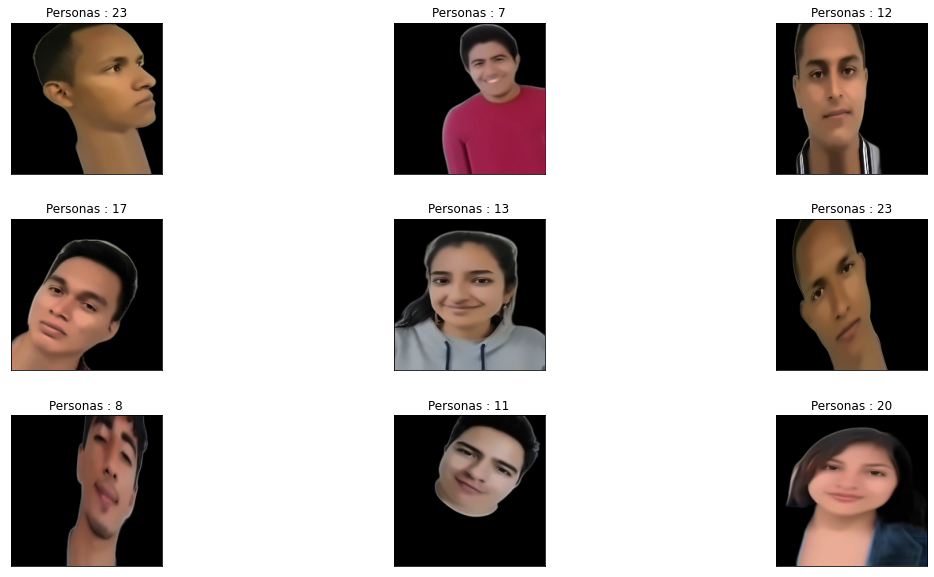

In [6]:
"""Función para mostrar imágenes aleatorias que recieben las etiquetas e imágenes"""
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Personas : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

# Preparar datos para entrenar el modelo CNN

In [7]:
#1-paso en el barajado de datos

#obtener números igualmente espaciados en un rango dado
n = np.arange(images.shape[0])
print("'n' valores antes de barajar = ",n)

#mezclar todos los valores igualmente espaciados en la lista 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' valores despues de barajar= ",n)

'n' valores antes de barajar =  [   0    1    2 ... 2071 2072 2073]

'n' valores despues de barajar=  [ 131  216 1786 ...  501  348  382]


In [8]:
#2-paso en el barajado de datos

#barajar las imágenes y los datos de las etiquetas correspondientes en ambas listas
images = images[n]
labels = labels[n]

print("Forma de las imagenes despues de barajar = ",images.shape,"\nEtiquetas despues de barajar = ",labels.shape)

Forma de las imagenes despues de barajar =  (2074, 192, 192, 3) 
Etiquetas despues de barajar =  (2074,)


In [9]:
"""Forma de imágenes"""
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Forma de las imágenes después de la normalización = ",images.shape)

Forma de las imágenes después de la normalización =  (2074, 192, 192, 3)


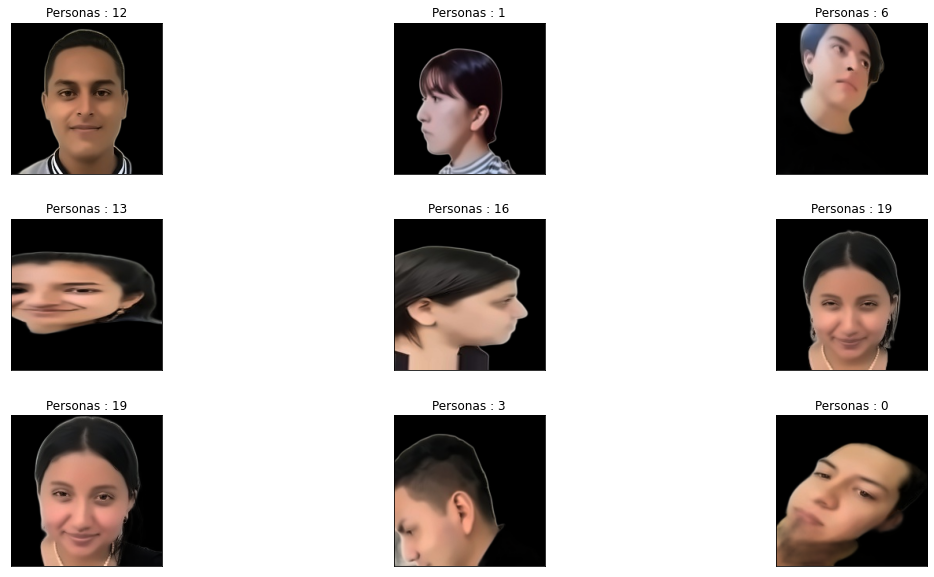

In [10]:
display_rand_images(images, labels)

In [10]:
"""Variables de entrenamiento y prueba"""
train_ds, test_ds, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("enternamiento_ds forma = ",train_ds.shape)
print("entrenamiento_etiqueta forma = ",train_labels.shape)
print("\nprueba_ds forma = ",test_ds.shape)
print("prueba_etiqueta forma = ",test_labels.shape)

enternamiento_ds forma =  (1659, 192, 192, 3)
entrenamiento_etiqueta forma =  (1659,)

prueba_ds forma =  (415, 192, 192, 3)
prueba_etiqueta forma =  (415,)


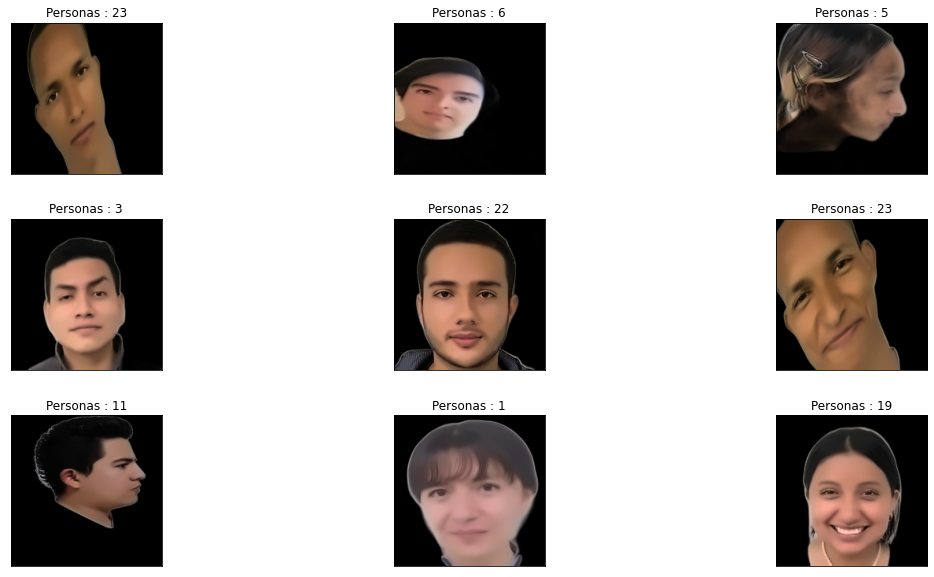

In [117]:
display_rand_images(train_ds, train_labels)

In [11]:
## Cambiar el tamaño de las imágenes
train_ds = tf.image.resize(train_ds, (227, 227))
test_ds = tf.image.resize(test_ds, (227, 227)) #AQUI ESTABAN 150

AQUI DEBE DE COMENZAR EL MODELO

# PCA

In [12]:
from keras.models import Model, Sequential
from sklearn import preprocessing
from keras.utils import to_categorical
from sklearn.decomposition import PCA
from keras.applications.vgg16 import VGG16
from keras.layers import  Input

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [14]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [15]:
SIZE = 192  
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))
for layer in VGG_model.layers:
    layer.trainable = False
VGG_model.summary() 


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 192, 192, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 192, 192, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 192, 192, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 96, 96, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 96, 96, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 96, 96, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 48, 48, 128)       0     

In [37]:
train_feature_extractor=VGG_model.predict(x_train)
train_features = train_feature_extractor.reshape(train_feature_extractor.shape[0], -1)
#test features
test_feature_extractor=VGG_model.predict(x_test)
test_features = test_feature_extractor.reshape(test_feature_extractor.shape[0], -1)

13/13 [==============================] - 210s 16s/step


Text(0, 0.5, 'Cum variance')

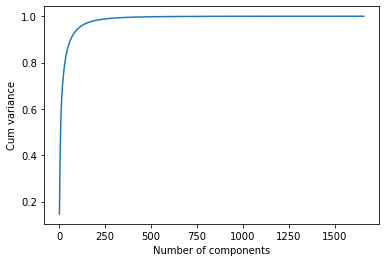

In [75]:
pca_test = PCA(n_components=1659) #
pca_test.fit(train_features)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cum variance")

In [76]:
n_PCA_components = 250
pca = PCA(n_components=n_PCA_components)
train_PCA = pca.fit_transform(train_features)
test_PCA = pca.transform(test_features)

In [77]:
model = Sequential()
inputs = Input(shape=(n_PCA_components,)) #Shape = n_components
hidden = Dense(192, activation='relu')(inputs)
#hidden1 = Dense(512, activation='relu')(inputs)
#hidden2 = Dense(192, activation='relu')(hidden1)
output = Dense(24, activation='softmax')(hidden)
model = Model(inputs=inputs, outputs=output)

In [78]:
print(model.summary())
#
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['categorical_accuracy'])

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 250)]             0         
                                                                 
 dense_12 (Dense)            (None, 192)               48192     
                                                                 
 dense_13 (Dense)            (None, 24)                4632      
                                                                 
Total params: 52,824
Trainable params: 52,824
Non-trainable params: 0
_________________________________________________________________
None


In [79]:
import datetime
start = datetime.datetime.now()
#Fit the model. Do not forget to use on-hot-encoded Y values. 
model.fit(train_PCA, y_train_one_hot, epochs=50, verbose=1,callbacks=[es])

end = datetime.datetime.now()
print("Total execution time with PCA is: ", end-start)

Epoch 1/50
52/52 [==============================] - 10s 3ms/step - loss: 3.1680 - categorical_accuracy: 0.0639
Epoch 2/50
52/52 [==============================] - 0s 3ms/step - loss: 3.1431 - categorical_accuracy: 0.0729
Epoch 3/50
52/52 [==============================] - 0s 3ms/step - loss: 3.1248 - categorical_accuracy: 0.0735
Epoch 4/50
52/52 [==============================] - 0s 3ms/step - loss: 3.1120 - categorical_accuracy: 0.0699
Epoch 5/50
52/52 [==============================] - 0s 3ms/step - loss: 3.1001 - categorical_accuracy: 0.0705
Epoch 6/50
52/52 [==============================] - 0s 3ms/step - loss: 3.0875 - categorical_accuracy: 0.0759
Epoch 7/50
52/52 [==============================] - 0s 3ms/step - loss: 3.0728 - categorical_accuracy: 0.1019
Epoch 8/50
52/52 [==============================] - 0s 3ms/step - loss: 3.0560 - categorical_accuracy: 0.1049
Epoch 9/50
52/52 [==============================] - 0s 3ms/step - loss: 3.0371 - categorical_accuracy: 0.1109
Epoch 10/

Epoch 25/50
52/52 [==============================] - 0s 3ms/step - loss: 2.5866 - categorical_accuracy: 0.3044
Epoch 26/50
52/52 [==============================] - 0s 3ms/step - loss: 2.5567 - categorical_accuracy: 0.3086
Epoch 27/50
52/52 [==============================] - 0s 3ms/step - loss: 2.5289 - categorical_accuracy: 0.3128
Epoch 28/50
52/52 [==============================] - 0s 3ms/step - loss: 2.5008 - categorical_accuracy: 0.3327
Epoch 29/50
52/52 [==============================] - 0s 3ms/step - loss: 2.4726 - categorical_accuracy: 0.3285
Epoch 30/50
52/52 [==============================] - 0s 3ms/step - loss: 2.4451 - categorical_accuracy: 0.3484
Epoch 31/50
52/52 [==============================] - 0s 3ms/step - loss: 2.4182 - categorical_accuracy: 0.3550
Epoch 32/50
52/52 [==============================] - 0s 3ms/step - loss: 2.3927 - categorical_accuracy: 0.3574
Epoch 33/50
52/52 [==============================] - 0s 3ms/step - loss: 2.3663 - categorical_accuracy: 0.3713
E

Epoch 49/50
52/52 [==============================] - 0s 4ms/step - loss: 1.9940 - categorical_accuracy: 0.4907
Epoch 50/50
52/52 [==============================] - 0s 3ms/step - loss: 1.9724 - categorical_accuracy: 0.4985
Total execution time with PCA is:  0:00:18.401974


In [80]:
predict_test = model.predict(test_PCA)
predict_test = np.argmax(predict_test, axis=1)
predict_test = le.inverse_transform(predict_test)

13/13 [==============================] - 6s 1ms/step


In [81]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predict_test))

Accuracy =  0.39036144578313253


# DROPOUT - GRIDSEARCH

In [10]:
from keras.callbacks import LearningRateScheduler
from sklearn.model_selection import GridSearchCV
from keras.constraints import maxnorm

In [11]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

In [12]:
# normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [13]:
# reshape images to 1D so we can just work with dense layers
#For this demo purposes
x_train = x_train.reshape(1659,192, 192, 3)
x_test = x_test.reshape(415, 192, 192, 3)

num_classes = 24

In [14]:
# One hot encoding for categorical labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [15]:
#Take a subset of train for grid search. Let us take 10% for now
from sklearn.model_selection import train_test_split
x_grid, x_not_use, y_grid, y_not_use = train_test_split(x_train, y_train, test_size=0.9, random_state=42)


In [16]:
# build the model
input_dim = x_grid.shape[1]

In [23]:
#NOTE: Add default optimizer, otherwise throws error 'optimizer not legal parameter'
def define_model(dropout_rate=0.0, weight_constraint=0, neurons=10):   

    model=Sequential()

    #1 conv layer
    model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

    #1 max pool layer
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

    model.add(BatchNormalization())

    #2 conv layer
    model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

    #2 max pool layer
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

    model.add(BatchNormalization())

    #3 conv layer
    model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

    #4 conv layer
    model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

    #5 conv layer
    model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

    #3 max pool layer
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

    model.add(BatchNormalization())


    model.add(Flatten())

    #1 dense layer
    model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

    model.add(Dropout(0.4))

    model.add(BatchNormalization())

    #2 dense layer
    model.add(Dense(4096,activation="relu"))

    model.add(Dropout(0.4))

    model.add(BatchNormalization())

    #3 dense layer
    model.add(Dense(1000,activation="relu"))

    model.add(Dropout(0.4))

    model.add(BatchNormalization())

    #output layer
    model.add(Dense(24,activation="softmax"))

    model.summary()
    
    # compile the model
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='sdam',      
                  metrics=['accuracy'])
    return model

In [24]:
# implement the Scikit-Learn classifier interface
# requires model defined as a function, which we already have
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=define_model, 
                        verbose=1)

C:\Users\wilme\AppData\Local\Temp\ipykernel_1988\466899070.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=define_model,


In [25]:
dropout_rate = [0.0, 0.2, 0.4]
weight_constraint = [1, 2, 3]
neurons = [10, 32, 64]
batch_size = [100, 200, 400]
epochs = [1, 5, 10]

In [26]:
param_grid = dict(dropout_rate=dropout_rate, 
                  weight_constraint=weight_constraint,
                  neurons=neurons, batch_size=batch_size, 
                  epochs=epochs)

In [ ]:
#n_jobs=16 uses 16 CPUs. Try not to do -1 on your system as it may hang!!!
# -1 refers to using all available CPUs
#Cross validation, cv=3
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)

grid_result = grid.fit(x_grid, y_grid)

In [22]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

NameError: name 'grid_result' is not defined

# Definir el modelo CNN de AlexNet


Definir todas las capas en el modelo AlexNet CNN

In [32]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(24,activation="softmax"))

model.summary()

TypeError: 'int' object is not iterable


Compilar el modelo CNN

In [29]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [30]:
"""Usando EarlyStopping para mayor acurrancy"""
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

Ajuste el modelo usando datos de entrenamiento

In [31]:
model.fit(train_PCA, y_train_one_hot, 
          epochs=100,
          callbacks=[es])


Epoch 1/100


ValueError: in user code:

    File "C:\Users\wilme\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\wilme\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\wilme\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\wilme\anaconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\wilme\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\wilme\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 227, 227, 3), found shape=(None, 700)


Métricas para evaluar la precisión y la pérdida en el conjunto de datos de prueba

In [24]:
loss, accuracy = model.evaluate(test_ds, test_labels)

print(loss,accuracy)

13/13 [==============================] - 20s 942ms/step - loss: 3.7705 - accuracy: 0.4892
3.7705204486846924 0.4891566336154938


# Predecir valores usando el modelo entrenado

In [39]:
"""Declarando variable para predecir"""
pred = model.predict(test_ds)

pred.shape

1/1 [==============================] - 8s 8s/step


(30, 20)


Muestre pocas imágenes aleatorias con valores de etiquetas reales versus predichos

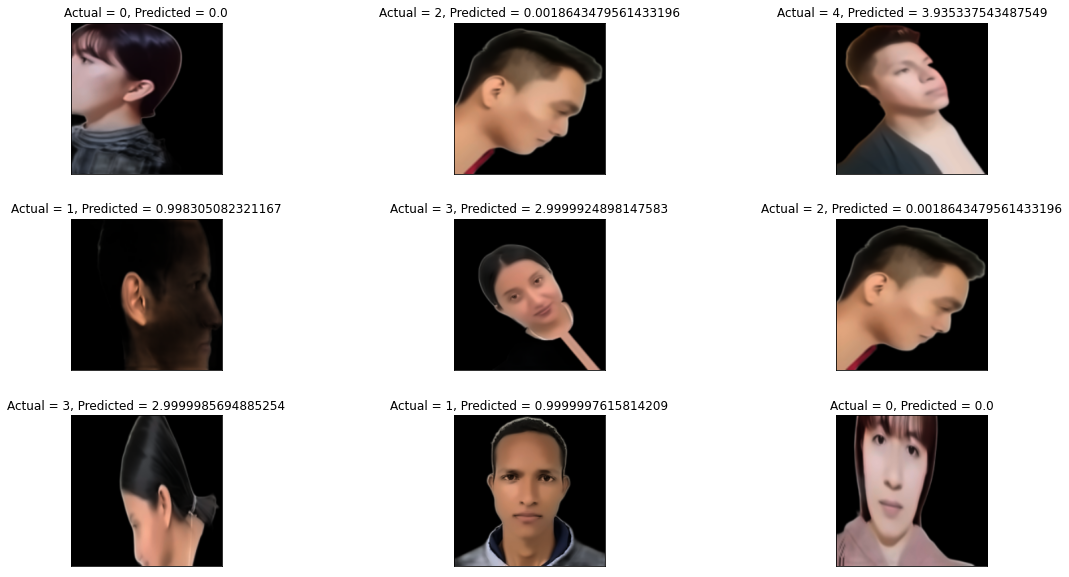

In [41]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, test_ds.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(test_ds[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(test_labels[r[0]] , test_labels[r[0]]*pred[r[0]][test_labels[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

In [4]:
loss, accuracy = model.evaluate(test_ds, test_labels)

print(loss,accuracy)

NameError: name 'model' is not defined